# Data Analysis and Data Science
## Be curious about the data 

By: Caroline Labelle
<br>For: BCM6065-65

<br>
Date: June  30th 2022

<hr style="border:1px solid black"> </hr>


**Student Name**: 

Complete the following exercises and submit your Notebook in a HTML format on StudiUM. You have until July 1st, 2022, 1:00pm to hand-in your Notebook.

## Python Libraries

Import the Pandas, seaborn and Matplotlib.pyplot

In [1]:
### Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
### (If you wish)
### Seaborn theme parameters
sns.set_theme(context='notebook', style='darkgrid', palette='pastel', 
                  font='sans-serif', font_scale=1, color_codes=True, rc=None)

## Get the data [5 pts]

Download the <code>breast_cancer_metametric.tsv</code> dataset from StudiUM and upload it to the Jupyter IRIC server. Using <code>pandas</code>, read the file and save its content into a variable as a dataframe.

In [6]:
## Define variable with file name
file_name="breast_cancer_metametric.tsv"

In [7]:
## Read and save data into variable as a dataframe
df=pd.read_csv(file_name, sep='\t')

In [8]:
df.head()

,CHEMOTHERAPY,HORMONE_THERAPY,RADIO_THERAPY,BREAST_SURGERY,CELLULARITY,VITAL_STATUS,GRADE,COHORT,MUTATION_COUNT,NPI,OS_MONTHS,TUMOR_SIZE,TUMOR_STAGE,AGE_GROUP
0,1.0,1.0,1.0,0.0,2.0,0.0,3.0,1.0,2.0,4.038,174.266667,19.0,1.0,30.0
1,1.0,1.0,1.0,0.0,1.0,2.0,3.0,1.0,4.0,6.046,48.600000,23.0,2.0,30.0
2,1.0,1.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,5.104,79.333333,52.0,3.0,80.0
3,0.0,1.0,0.0,0.0,2.0,0.0,2.0,3.0,5.0,3.036,224.600000,18.0,1.0,40.0
4,0.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,4.040,147.366667,20.0,1.0,60.0


## Explore the data [10 pts + 2pts]

Using various <code>pandas</code> functions, answer the following questions. **Make sure you answers are explicitely outputed by your code.**

1. How many variables and samples are there in your dataset?

In [9]:
print ("The number of samples is "+str(df.shape[0])+".")

The number of samples is 1104.


In [10]:
print ("The number of variables is "+str(df.shape[1])+".")

The number of variables is 14.


***
2. How many age groups are considered?

In [14]:
#Unique Age Groups that appear
df.AGE_GROUP.unique()

array([30., 80., 40., 60., 50., nan, 90.])

In [15]:
print ("The number of age groups considered is "+str(len(df.AGE_GROUP.unique()))+".")
print("The number of age groups considered is "+str(len(df.AGE_GROUP.unique())-1)+" if we don't take NaN into account.")

The number of age groups considered is 7.
The number of age groups considered is 6 if we don't take NaN into account.


***
3. What is the mean overall survival (in month)?

In [17]:
print ("The mean overall survival in months is "+str(df.OS_MONTHS.mean())+".")

The mean overall survival in months is 126.10326086947474.


***
4. What is the highest mutation count?

In [18]:
print ("The highest mutation count is "+str(df.MUTATION_COUNT.max())+".")

The highest mutation count is 46.0.


***
5. How large is the smallest tumor?

In [19]:
print ("The width of the smallest tumor is "+str(df.TUMOR_SIZE.min())+".")

The width of the smallest tumor is 1.0.


***
6. What are the grades considered in the dataset?

In [21]:
print ("The grades considered in the dataset are "+str(df.GRADE.unique())+".")

The grades considered in the dataset are [3. 2. 1.].


***
7. What is the median Nottingham Prognostic Index (NPI)?

In [22]:
print ("The  median Nottingham Prognostic Index (NPI) is "+str(df.NPI.median())+".")

The  median Nottingham Prognostic Index (NPI) is 4.046.


***
8. a) What are the possible values for CHEMOTHERAPY, HORMONE_THERAPY, RADIO_THERAPY, BREAST_SURGERY? <br>b) What do you think these values represent? 

In [24]:
for i in ['CHEMOTHERAPY', 'HORMONE_THERAPY', 'RADIO_THERAPY', 'BREAST_SURGERY']:
    print ("The possible values for "+i+" are "+str(df[i].unique())+".")

The possible values for CHEMOTHERAPY are [1. 0.].
The possible values for HORMONE_THERAPY are [1. 0.].
The possible values for RADIO_THERAPY are [1. 0.].
The possible values for BREAST_SURGERY are [0. 1.].


***
**BONUS**
How many patients in the dataset have had breast surgery?

In [26]:
print ("The number of patients in the dataset that have had breast surgery is "+str(df.BREAST_SURGERY.sum())+".")

The number of patients in the dataset that have had breast surgery is 468.0.


## Visualize the data [45 pts + 10 pts]

You are first interested in the distribution of the overall survival of the various samples. You hypothesize that the distribution differ from one tumor stage to another.

Design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

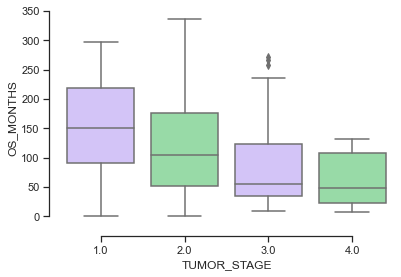

In [30]:
### Figure: survival score for each treatment
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show  OS_MONTHS by Tumor stage
sns.boxplot(x="TUMOR_STAGE", y="OS_MONTHS",
            palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)

**Interpretation** : 
There is statistically significant difference in Overall Survival between patients with tumors in stages 1 and 2 and patients with tumors in stages 3 and 4. 

***
You are now interested in the pairwise comparison of the following variables: the mutation count, the overall survival and the size of the tumor. 

You are wondering if any of these variables seem to be correlated. You also wonder if these pairwise comparison could be grouped based on the stage of the tumor.

Considering your variable of interest, make an hypothesis (what do you expect the results to be like?) and design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

**Hypothesis** : We could hypothesize that the mutation count, the overall survival and the size of the tumor are strongly correlated. 
We can also formulate the hypothesis that the correlation will grow stronger when grouped based on the stage of the tumor. 

In [35]:
### Figure

corr_df=df[['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE']].corr(method='pearson', min_periods=1)

### You can select a subset of a dataframe by defining a list of column names (col = []) 
### and then selecting those columns in the main dataframe (df[col])
### Ressource: https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html

corr_df.head()

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,0.057844,0.013116
OS_MONTHS,0.057844,1.000000,-0.226374
TUMOR_SIZE,0.013116,-0.226374,1.000000


In [36]:
corr_df.style.background_gradient(cmap='coolwarm')

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,0.057844,0.013116
OS_MONTHS,0.057844,1.000000,-0.226374
TUMOR_SIZE,0.013116,-0.226374,1.000000


In [59]:
df[df['TUMOR_STAGE']==1.0][['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE']].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
#plt.show()
#plt.title("Correlation between Mutation count, survival and tumor size at stage 1")

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,0.133361,0.027945
OS_MONTHS,0.133361,1.000000,-0.120752
TUMOR_SIZE,0.027945,-0.120752,1.000000


In [60]:
df[df['TUMOR_STAGE']==2.0][['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE']].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
#plt.show()
#plt.title("Correlation between Mutation count, survival and tumor size at stage 2")

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,-0.023598,0.065315
OS_MONTHS,-0.023598,1.000000,-0.103046
TUMOR_SIZE,0.065315,-0.103046,1.000000


In [61]:
df[df['TUMOR_STAGE']==3.0][['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE']].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
#plt.show()
#plt.title("Correlation between Mutation count, survival and tumor size at stage 3")

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,0.123397,-0.035227
OS_MONTHS,0.123397,1.000000,-0.098819
TUMOR_SIZE,-0.035227,-0.098819,1.000000


In [72]:
df[df['TUMOR_STAGE']==4.0][['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE']].corr(method='pearson', min_periods=1).style.background_gradient(cmap='coolwarm')
#plt.show()
#plt.title("Correlation between Mutation count, survival and tumor size at stage 4")

,MUTATION_COUNT,OS_MONTHS,TUMOR_SIZE
MUTATION_COUNT,1.000000,0.162329,0.786880
OS_MONTHS,0.162329,1.000000,-0.054554
TUMOR_SIZE,0.786880,-0.054554,1.000000


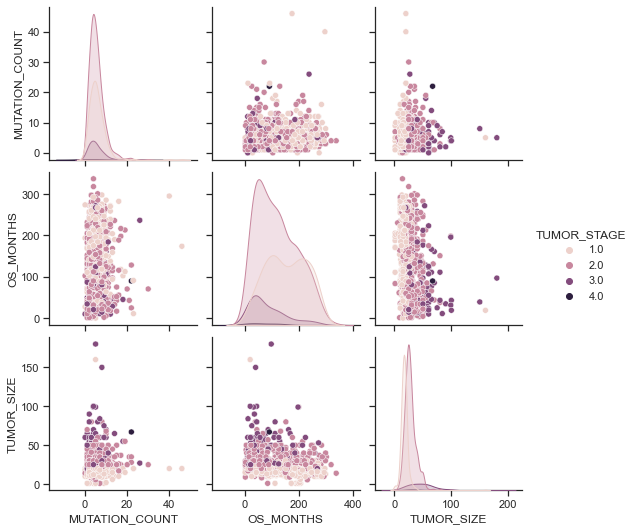

In [68]:
sns.set_theme(style="ticks")

sns.pairplot(df[['MUTATION_COUNT', 'OS_MONTHS', 'TUMOR_SIZE',"TUMOR_STAGE"]], hue="TUMOR_STAGE")

**Interpretation** : Variables don't seem to be correlated, except for mutation count and tumor size that become strongly correlated at tumor stage 4. 

***

What about the age of the patient? 

Do the age of the patient and/or the stage of the tumor affect the overall survival? Make a hypothesis regarding the relationship between the age of the patient, the stage of the tumor and the overall survival.

**Hypothesis** : We could hypothesize that both the age of the patient and the stage of the tumor negatively affect survival.  

You prefer to consider the overall survival in terms of YEARS rather than MONTHS. Add a column <code>OS_YEARS</code> to your dataframe, which is based on the <code>OS_MONTHS</code> column.

In [63]:
### Add OS_YEARS column to dataframe
df["OS_YEARS"]=df["OS_MONTHS"]/12

Design a figure that will help verify your hypothesis. Don<t forget to use the overall survival in years! **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

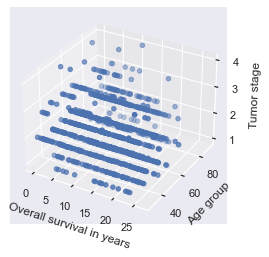

In [65]:
### Figure
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['OS_YEARS']
y = df['AGE_GROUP']
z = df['TUMOR_STAGE']

ax.set_xlabel("Overall survival in years")
ax.set_ylabel("Age group")
ax.set_zlabel("Tumor stage")

ax.scatter(x, y, z)

plt.show()

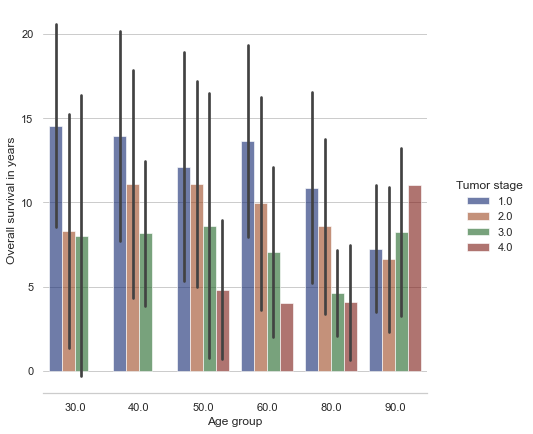

In [70]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by age group and tumor stage
g = sns.catplot(
    data=df, kind="bar",
    x="AGE_GROUP", y="OS_YEARS", hue="TUMOR_STAGE",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Age group", "Overall survival in years")
g.legend.set_title("Tumor stage")

**Interpretation** : The age group surprisingly does not seem to affect overall survival, except maybe after 90 years old.
As for the tumor stage, there is a clear trend indicating that the higher the tumor stage, the lower the survival time in years, except for the group over 90 years old where there does not seem to be any difference between the tumor stages in terms of survival. 

***
**BONUS** The Nottingham prognostic index (NPI) is based on histopathological factors (tumour size, lymph node stage and tumour grade) and is used to stratify BC patients with operable early-stage primary BC into prognostic groups. 

The overall survival (OS) represents the length of time from the start of treatment that patients diagnosed with the disease are still alive.

Considering this information and all the variables included in your dataset, make an hypothesis of your choosing that consider the NPI and design a figure that will help verify your hypothesis. **Make sure your figure is readable and displayed after your code.**

Briefly intepret your figure.

**Hypothesis** : The NPI, based on its definition, should be strongly correlated to tumour size, lymph node stage and tumour grade. It should also be correlated to the breast surgery. 

In [78]:
### Figure
df[["TUMOR_SIZE", "TUMOR_STAGE", "GRADE", "NPI", "BREAST_SURGERY"]].corr().style.background_gradient(cmap='coolwarm')

,TUMOR_SIZE,TUMOR_STAGE,GRADE,NPI,BREAST_SURGERY
TUMOR_SIZE,1.000000,0.535272,0.152531,0.353941,-0.270926
TUMOR_STAGE,0.535272,1.000000,0.170173,0.571408,-0.263653
GRADE,0.152531,0.170173,1.000000,0.715827,-0.064711
NPI,0.353941,0.571408,0.715827,1.000000,-0.209987
BREAST_SURGERY,-0.270926,-0.263653,-0.064711,-0.209987,1.000000


**Interpretation** : Surprisingly, the NPI does not seem to be correlated to the choice of breast surgery. However, as expected, NPI is strongly correlated to tumor grade. To go further, we could try performing a PCA and keeping only the most relevant parameters. 

## Trying for a PCA

In [80]:
for column in df.columns:
    print ("The number of missing data in column " +str(column)+ " is " +str(df[column].isna().sum())+".")

The number of missing data in column CHEMOTHERAPY is 0.
The number of missing data in column HORMONE_THERAPY is 0.
The number of missing data in column RADIO_THERAPY is 0.
The number of missing data in column BREAST_SURGERY is 0.
The number of missing data in column CELLULARITY is 0.
The number of missing data in column VITAL_STATUS is 0.
The number of missing data in column GRADE is 0.
The number of missing data in column COHORT is 0.
The number of missing data in column MUTATION_COUNT is 0.
The number of missing data in column NPI is 0.
The number of missing data in column OS_MONTHS is 0.
The number of missing data in column TUMOR_SIZE is 0.
The number of missing data in column TUMOR_STAGE is 0.
The number of missing data in column AGE_GROUP is 12.
The number of missing data in column OS_YEARS is 0.


In [82]:
clean_df=df.dropna(axis=0)
for column in clean_df.columns:
    print ("The number of missing data in column " +str(column)+ " is " +str(clean_df[column].isna().sum())+".")

The number of missing data in column CHEMOTHERAPY is 0.
The number of missing data in column HORMONE_THERAPY is 0.
The number of missing data in column RADIO_THERAPY is 0.
The number of missing data in column BREAST_SURGERY is 0.
The number of missing data in column CELLULARITY is 0.
The number of missing data in column VITAL_STATUS is 0.
The number of missing data in column GRADE is 0.
The number of missing data in column COHORT is 0.
The number of missing data in column MUTATION_COUNT is 0.
The number of missing data in column NPI is 0.
The number of missing data in column OS_MONTHS is 0.
The number of missing data in column TUMOR_SIZE is 0.
The number of missing data in column TUMOR_STAGE is 0.
The number of missing data in column AGE_GROUP is 0.
The number of missing data in column OS_YEARS is 0.


In [ ]:
#normalize the columns by their variance
#do the PCA 
#I did not have the time!